<a href="https://colab.research.google.com/github/Veronicarx77/441B-1/blob/main/HW4_IN_CLASS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 0.) Import the Credit Card Fraud Data From CCLE

In [1]:
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt
import numpy as np

In [2]:
drive.mount('/content/gdrive/', force_remount = True)

Mounted at /content/gdrive/


In [3]:
df = pd.read_csv("/content/gdrive/MyDrive/fraudTest.csv")

In [4]:
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [5]:
df_select = df[["trans_date_trans_time", "category", "amt", "city_pop", "is_fraud"]]
df_select["trans_date_trans_time"] = pd.to_datetime(df_select["trans_date_trans_time"])
df_select["time_var"] = [i.second for i in df_select["trans_date_trans_time"]]

X = pd.get_dummies(df_select, ["category"]).drop(["trans_date_trans_time", "is_fraud"], axis = 1)
y = df["is_fraud"]

<ipython-input-5-4cf99e5cc3d3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_select["trans_date_trans_time"] = pd.to_datetime(df_select["trans_date_trans_time"])
<ipython-input-5-4cf99e5cc3d3>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_select["time_var"] = [i.second for i in df_select["trans_date_trans_time"]]


# 1.) Use scikit learn preprocessing to split the data into 70/30 in out of sample

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# 2.) Make three sets of training data (Oversample, Undersample and SMOTE)

In [13]:
# Oversample
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state = 0)
ros.fit(X_train,y_train)
over_X, over_y =  ros.fit_resample(X_train,y_train)

In [14]:
# Undersample
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state = 0)
rus.fit(X_train,y_train)
under_X, under_y =  rus.fit_resample(X_train,y_train)

In [15]:
# SMOTE
from imblearn.over_sampling import SMOTE

oversample = SMOTE()
smote_X, smote_y = oversample.fit_resample(X_train,y_train)

# 3.) Train three logistic regression models 

In [16]:
from sklearn.linear_model import LogisticRegression

In [19]:
# over_log

over_log = LogisticRegression().fit(over_X, over_y)

In [20]:
# under_log

under_log = LogisticRegression().fit(under_X, under_y)

In [18]:
# smote_log

smote_log = LogisticRegression().fit(smote_X, smote_y)

# 4.) Test the three models

In [21]:
print('Oversample Accuracy:',over_log.score(X_test, y_test))

Oversample Accuracy: 0.8142289882194871


In [22]:
print('Undersample Accuracy:',under_log.score(X_test, y_test))

Undersample Accuracy: 0.8123035581467886


In [23]:
print('SMOTE Accuracy:',smote_log.score(X_test, y_test))

SMOTE Accuracy: 0.8213788718539312


# 5.) Which performed best in Out of Sample metrics?

In [24]:
# Due to the test sample accuracy, the SMOTE performed the best.

# 6.) Pick two features and plot the two classes before and after SMOTE.

In [26]:
import matplotlib.pyplot as plt

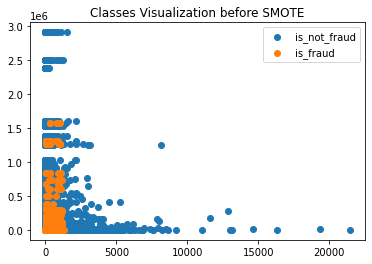

In [37]:
# before

OG_data_temp = pd.concat((X_train, y_train), axis= 1)

plt.scatter(OG_data_temp[OG_data_temp['is_fraud'] == 0]['amt'],OG_data_temp[OG_data_temp['is_fraud'] == 0]['city_pop'])
plt.scatter(OG_data_temp[OG_data_temp['is_fraud'] == 1]['amt'],OG_data_temp[OG_data_temp['is_fraud'] == 1]['city_pop'])
plt.title('Classes Visualization before SMOTE')
plt.legend(['is_not_fraud','is_fraud'])
plt.show()


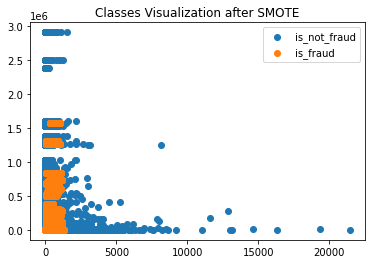

In [38]:
# after

after_smote = pd.concat((smote_X, smote_y), axis= 1)

plt.scatter(after_smote[after_smote['is_fraud'] == 0]['amt'],after_smote[after_smote['is_fraud'] == 0]['city_pop'])
plt.scatter(after_smote[after_smote['is_fraud'] == 1]['amt'],after_smote[after_smote['is_fraud'] == 1]['city_pop'])
plt.title('Classes Visualization after SMOTE')
plt.legend(['is_not_fraud','is_fraud'])
plt.show()
